# Clustering

# Crime Dataset

# Hierarchical Cluster 

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# load crime dataset
crime = pd.read_csv("/Users/Admin/Documents/data science assignment/clustring/crime_data.csv")

In [5]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Normalized the data

In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


# Build Hierarchy Cluster

In [8]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [9]:
z = linkage(df_norm, method="complete",metric="euclidean")

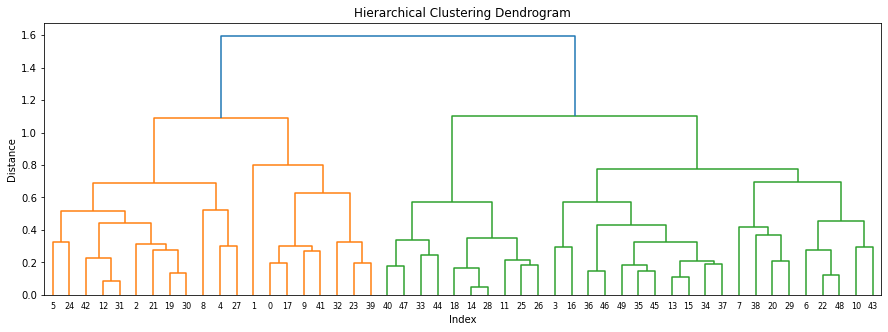

In [10]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [11]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df_norm) 

In [12]:
h_complete.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [13]:
cluster_labels=pd.Series(h_complete.labels_)

In [14]:
crime['cluster']=cluster_labels # creating a  new column and assigning it to new column 
crime = crime.iloc[:,[5,0,1,2,3,4]]
crime.head()

,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,0,California,9.0,276,91,40.6


In [15]:
# getting aggregate mean of each cluster
crime.groupby(crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.


#### As per the above displayed dendogram, we get two clusters. But it really depends on the business case to chose the number of clusters. As i have entered n_clusters as 3 and i chosed linkage='complete' so it has formed 3 cluster and output is obtained for that.

# K-Means Cluster

In [16]:
# import all required libraries
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [17]:
# Generating random uniform numbers 
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X # df_xy["X"] = X
df_xy.Y = Y

<AxesSubplot:xlabel='X', ylabel='Y'>

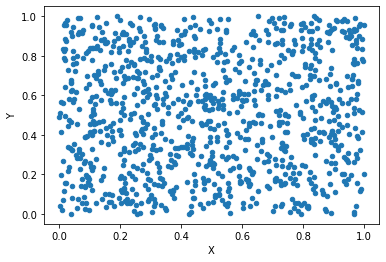

In [18]:
df_xy.plot(x="X",y = "Y",kind="scatter")

In [19]:
model1 = KMeans(n_clusters=5).fit(df_xy)

In [20]:
model1.labels_

array([0, 2, 1, 0, 1, 2, 1, 0, 3, 2, 3, 2, 0, 0, 0, 1, 1, 3, 1, 4, 2, 1,
       4, 0, 0, 0, 1, 1, 2, 0, 1, 3, 3, 0, 3, 1, 2, 4, 1, 4, 0, 0, 2, 2,
       1, 0, 3, 1, 2, 3, 4, 2, 4, 1, 2, 2, 3, 2, 3, 1, 4, 4, 4, 0, 2, 2,
       4, 0, 2, 0, 3, 1, 2, 3, 1, 1, 1, 0, 0, 1, 1, 3, 1, 2, 1, 4, 1, 0,
       0, 0, 2, 3, 2, 0, 3, 4, 0, 3, 4, 4, 3, 0, 4, 0, 4, 4, 3, 1, 0, 1,
       1, 1, 0, 4, 0, 2, 4, 1, 4, 4, 4, 2, 0, 4, 1, 2, 3, 0, 2, 1, 4, 1,
       1, 4, 0, 2, 3, 3, 1, 3, 1, 0, 0, 2, 4, 0, 3, 4, 1, 3, 4, 2, 1, 4,
       4, 0, 0, 4, 0, 3, 0, 2, 0, 3, 2, 3, 2, 3, 4, 2, 0, 4, 3, 2, 0, 0,
       2, 1, 2, 3, 4, 1, 4, 4, 2, 1, 2, 1, 0, 3, 1, 2, 1, 1, 1, 3, 1, 4,
       4, 1, 1, 0, 3, 1, 3, 3, 4, 4, 3, 4, 2, 2, 0, 1, 2, 1, 2, 2, 4, 0,
       1, 4, 2, 2, 4, 3, 0, 4, 1, 0, 0, 2, 0, 4, 3, 2, 2, 1, 3, 4, 4, 4,
       0, 1, 2, 2, 3, 0, 1, 1, 4, 2, 0, 1, 2, 3, 4, 1, 2, 4, 1, 1, 1, 1,
       2, 2, 3, 4, 3, 1, 1, 0, 0, 1, 2, 1, 4, 1, 0, 2, 1, 3, 4, 4, 0, 2,
       2, 4, 0, 4, 0, 0, 3, 4, 0, 0, 3, 1, 1, 3, 4,

In [21]:
model1.cluster_centers_

array([[0.76455507, 0.22692785],
       [0.2271709 , 0.23854887],
       [0.21887321, 0.78125632],
       [0.54068738, 0.55291101],
       [0.8299326 , 0.79665569]])

<AxesSubplot:xlabel='X', ylabel='Y'>

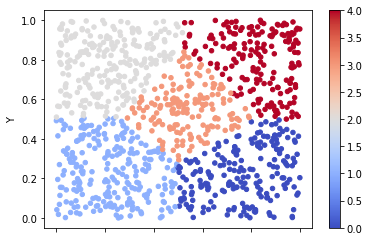

In [22]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",cmap=plt.cm.coolwarm)

In [23]:
# Kmeans on crime Data set 
crime1 = pd.read_csv("/Users/Admin/Documents/data science assignment/clustring/crime_data.csv")

In [24]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Normalize data

In [25]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    #x = (i-i.mean())/i.std()
    return (x)

In [26]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime1.iloc[:,1:])

In [27]:
df_norm.head(10) 

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [28]:
# screw plot or elbow curve 
k = list(range(2,15))
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Build kmeans cluster

In [29]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x173a3510ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

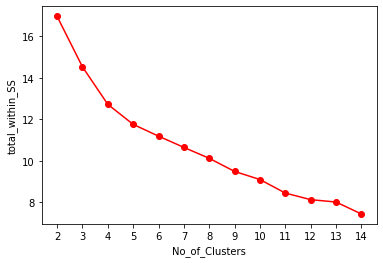

In [30]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [31]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(n_clusters=5)

In [32]:
model.labels_ # getting the labels of clusters assigned to each row 

array([0, 2, 2, 1, 2, 2, 3, 1, 2, 0, 3, 4, 2, 1, 4, 1, 1, 0, 4, 2, 3, 2,
       4, 0, 1, 1, 1, 2, 4, 3, 2, 2, 0, 4, 3, 1, 1, 3, 3, 0, 4, 0, 2, 3,
       4, 1, 3, 4, 4, 1])

In [33]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [34]:
crime1['cluster']=md

In [35]:
crime1.head(10) # creating a  new column and assigning it to new column 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [36]:
crime1 = crime1.iloc[:,[5,0,1,2,3,4]]

In [38]:
crime1.iloc[:,1:7].groupby(crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.

#### As observed from the above K-means plotting;with 5 clusters; there is no outliers or overlap has happened.Hence the 5 clusters is good for this model.

# DBSCAN Cluster

In [39]:
# import all required libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [40]:
# load crime dataset
crime2 = pd.read_csv("/Users/Admin/Documents/data science assignment/clustring/crime_data.csv ",index_col=0)

In [41]:
crime2

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [42]:
print(crime2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


In [43]:
crime2[['Murder','Assault','UrbanPop','Rape']]

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [44]:
array=crime2.values

In [45]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

# Normalize data

In [46]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [47]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Build DBSCAN cluster

In [48]:
dbscan = DBSCAN(eps=0.9, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=6)

In [49]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [50]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [51]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [52]:
pd.concat([crime2,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236.0,58.0,21.2,NaN
Alaska,10.0,263.0,48.0,44.5,NaN
Arizona,8.1,294.0,80.0,31.0,NaN
Arkansas,8.8,190.0,50.0,19.5,NaN
California,9.0,276.0,91.0,40.6,NaN
...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,0.0
46,NaN,NaN,NaN,NaN,-1.0
47,NaN,NaN,NaN,NaN,-1.0
48,NaN,NaN,NaN,NaN,0.0


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.


#### As observed from the above DBSCAN ; It's epsilon is 0.9 and minpoints is 6 for that there are outliers are obtained for this model.

### Compared to all 3 Clustering K-means Clustering is good for this model. Because there is less or no outliers obtained for this dataset.